# import library

In [1]:
library(readr)
library(tidyverse)
library(DT)
library(DataExplorer)
library(Kendall)
library(vroom)
library(corrplot)
library(RColorBrewer)
library(PerformanceAnalytics)
library(MASS)
library(lmtest)
library(car)
library(fmsb)
library(outliers)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
√ ggplot2 3.2.1     √ dplyr   0.8.3
√ tibble  2.1.3     √ stringr 1.4.0
√ tidyr   1.0.0     √ forcats 0.4.0
√ purrr   0.3.3     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
corrplot 0.84 loaded
Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: carData

Attaching package:

In [2]:
data <- read.csv(file = "train.csv", header = T)

In [3]:
head(data)

Formatted.Date,Summary,Precip.Type,Temperature..C.,Apparent.Temperature..C.,Humidity,Wind.Speed..km.h.,Wind.Bearing..degrees.,Pressure..millibars.,Visibility
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,1015.13,15.8263
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,1015.63,15.8263
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,1015.94,14.9569
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,1016.41,15.8263
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,1016.51,15.8263
2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,1016.66,14.9569


In [4]:
data <- data.frame(data)

In [5]:
introduce(data = data)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
50000,10,3,7,0,0,50000,500000,7604072


In [6]:
data$Formatted.Date <- as.Date(data$Formatted.Date)

In [7]:
str(data)

'data.frame':	50000 obs. of  10 variables:
 $ Formatted.Date          : Date, format: "2006-04-01" "2006-04-01" ...
 $ Summary                 : Factor w/ 21 levels "Breezy","Breezy and Foggy",..: 16 16 14 16 14 16 16 16 16 16 ...
 $ Precip.Type             : Factor w/ 2 levels "rain","snow": 1 1 1 1 1 1 1 1 1 1 ...
 $ Temperature..C.         : num  9.47 9.36 9.38 8.29 8.76 ...
 $ Apparent.Temperature..C.: num  7.39 7.23 9.38 5.94 6.98 ...
 $ Humidity                : num  0.89 0.86 0.89 0.83 0.83 0.85 0.95 0.89 0.82 0.72 ...
 $ Wind.Speed..km.h.       : num  14.12 14.26 3.93 14.1 11.04 ...
 $ Wind.Bearing..degrees.  : int  251 259 204 269 259 258 259 260 259 279 ...
 $ Pressure..millibars.    : num  1015 1016 1016 1016 1017 ...
 $ Visibility              : num  15.8 15.8 15 15.8 15.8 ...


# check missing value

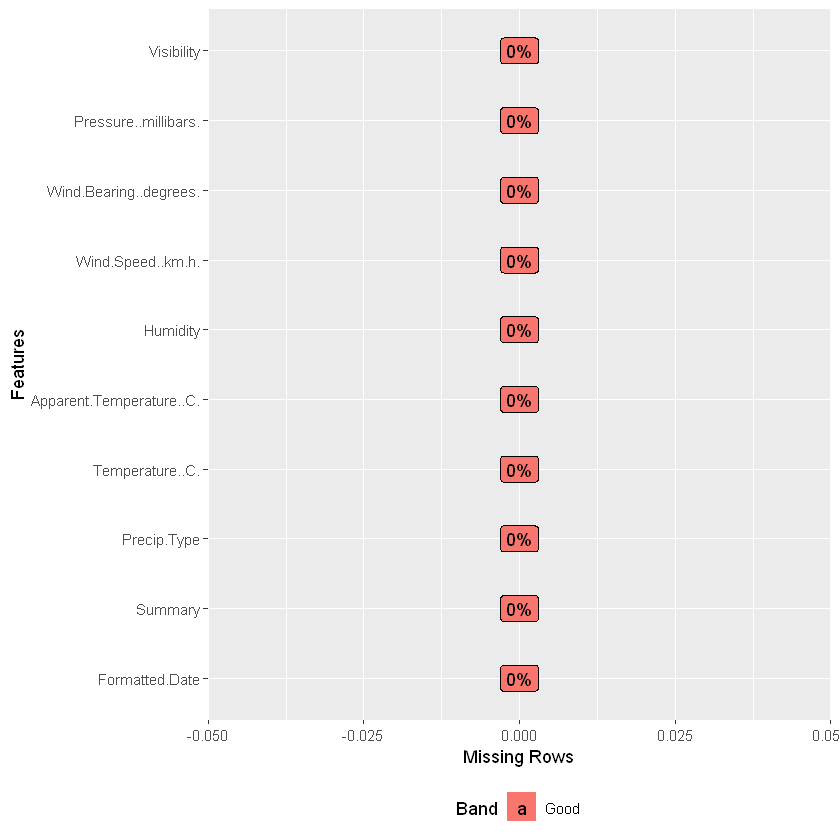

In [8]:
plot_missing(data = data)

# visualize

1 columns ignored with more than 50 categories.
Formatted.Date: 2083 categories



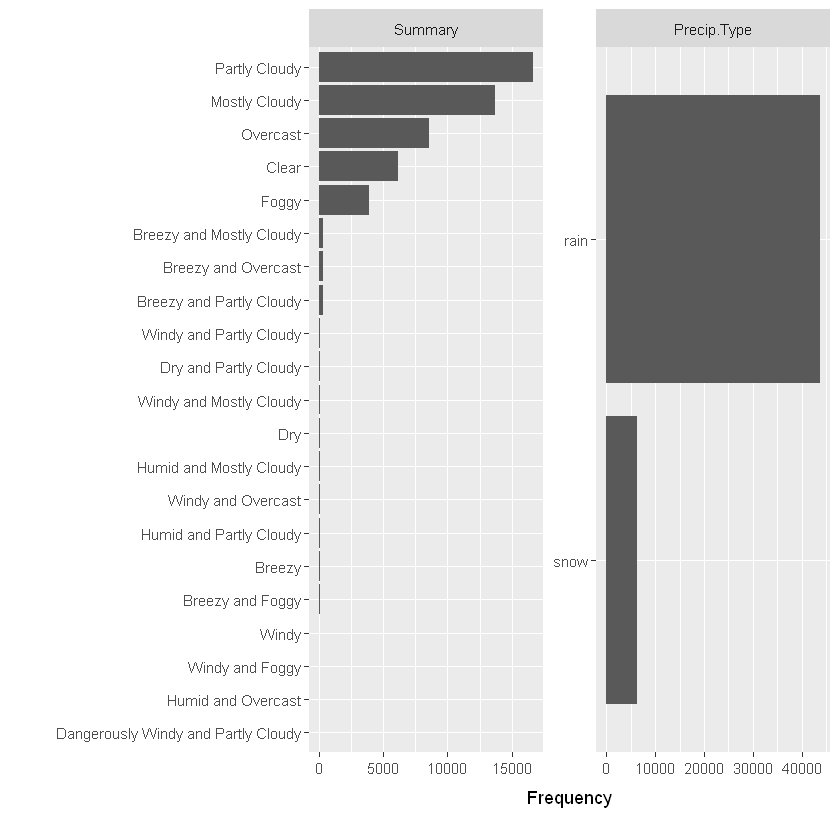

In [9]:
plot_bar(data = data)

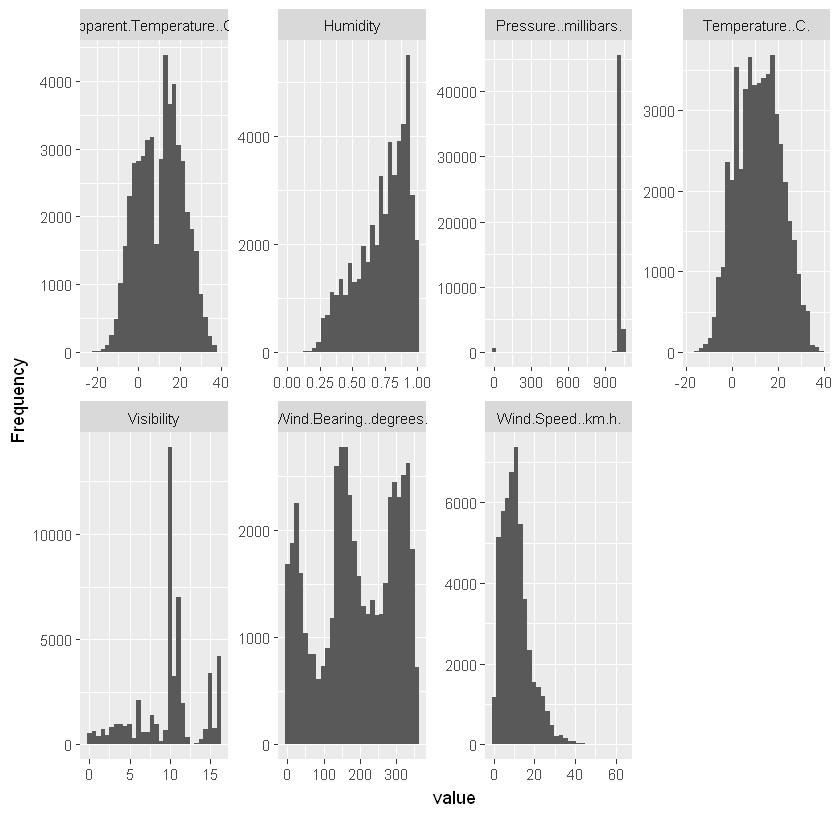

In [10]:
plot_histogram(data = data)

# correlation

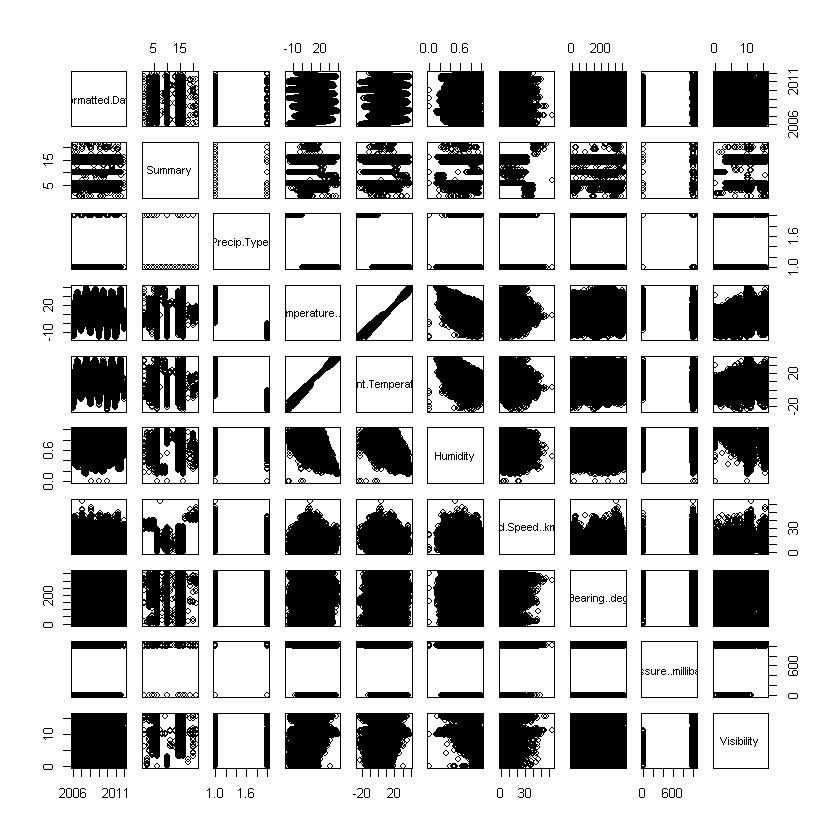

In [14]:
pairs(data)

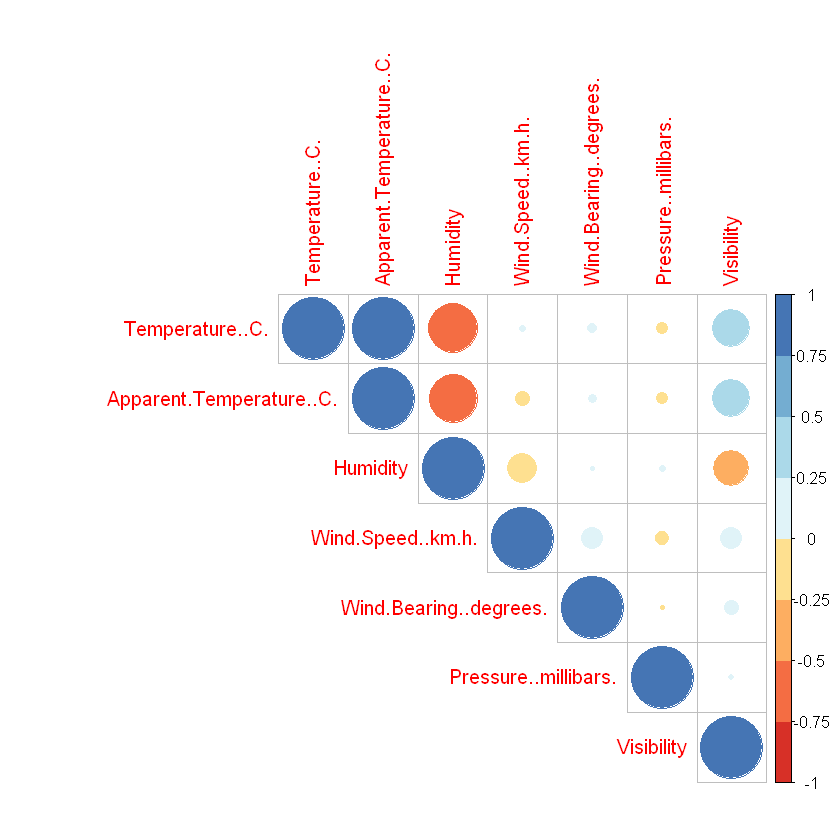

In [12]:
M <-cor(data %>% 
          dplyr::select(Temperature..C., Apparent.Temperature..C., Humidity , Wind.Speed..km.h.,Wind.Bearing..degrees., Pressure..millibars., Visibility))

corrplot(M, type="upper", order = "original",col=brewer.pal(n=8, name="RdYlBu"))

Temperature..C. 변수와 Apparent.Temperature..C. 변수의 상관관계가 매우 높음을 알 수 있다. 이는 Apparent.Temperature..C. 변수가 습도와 기온이 복합되어 실제로 느끼는 온도를 의미하기 때문이다. 이 두 변수는 후에 처리할 것이다.

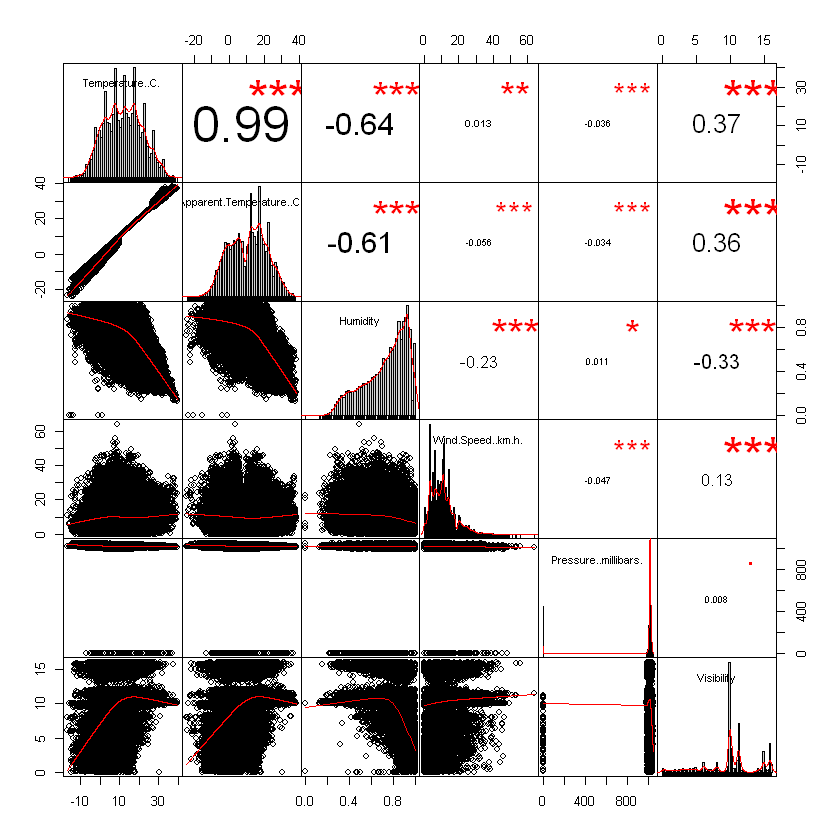

In [13]:
chart.Correlation(data %>% 
              dplyr::select(Temperature..C., Apparent.Temperature..C., Humidity , Wind.Speed..km.h., Pressure..millibars., Visibility), histogram=TRUE, pch=19)

# outlier detection, box plot

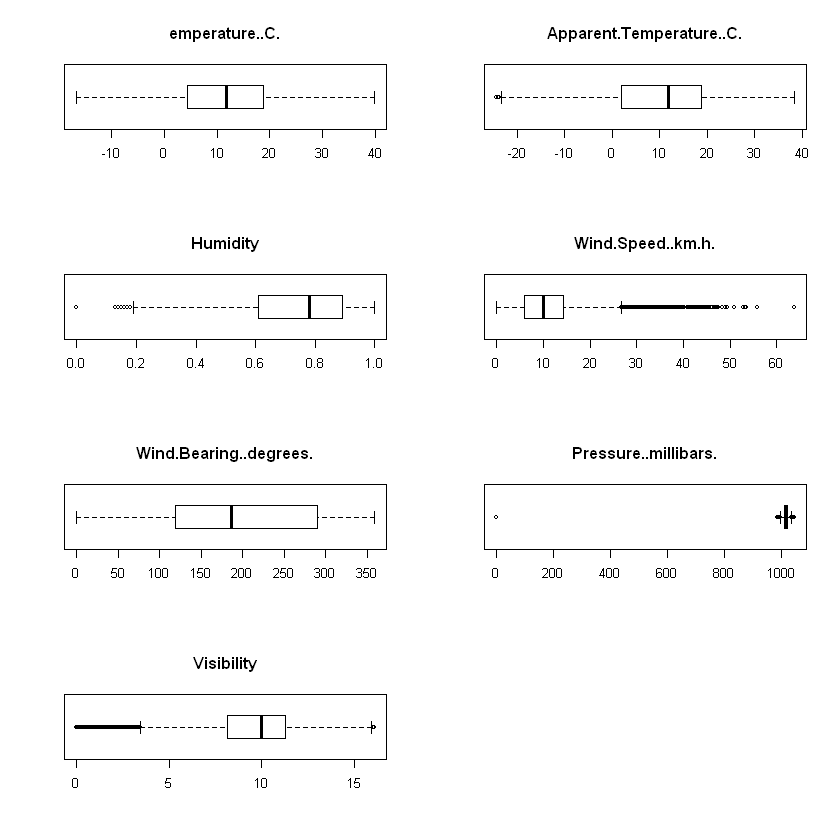

In [15]:
par(mfrow=c(4,2))
boxplot(data$Temperature..C., horizontal = T, main="emperature..C.")
boxplot(data$Apparent.Temperature..C., horizontal = T, main="Apparent.Temperature..C.")

boxplot(data$Humidity, horizontal = T, main="Humidity")
boxplot(data$Wind.Speed..km.h., horizontal = T, main="Wind.Speed..km.h.")

boxplot(data$Wind.Bearing..degrees., horizontal = T, main="Wind.Bearing..degrees.")
boxplot(data$Pressure..millibars., horizontal = T, main="Pressure..millibars.")

boxplot(data$Visibility, horizontal = T, main="Visibility")


> 귀무가설 : 회귀모형은 타당하지 않다.

> 대립가설 : 회귀모형은 타당하다.

# model selection - linear regression model

In [22]:
full.model<- lm(data$Visibility~., 
                data = data)

step.model <- stepAIC(full.model,
                      direction = "both", 
                      trace = FALSE)

summary(step.model)


Call:
lm(formula = data$Visibility ~ Formatted.Date + Summary + Precip.Type + 
    Temperature..C. + Apparent.Temperature..C. + Humidity + Wind.Speed..km.h. + 
    Wind.Bearing..degrees. + Pressure..millibars., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4408  -1.4567  -0.5285   1.2841   8.6995 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 1.478e+01  6.280e-01  23.530
Formatted.Date                             -2.871e-04  2.101e-05 -13.663
SummaryBreezy and Foggy                    -9.894e+00  1.082e+00  -9.141
SummaryBreezy and Mostly Cloudy            -1.752e+00  5.667e-01  -3.092
SummaryBreezy and Overcast                 -1.134e+00  5.687e-01  -1.995
SummaryBreezy and Partly Cloudy            -1.913e+00  5.702e-01  -3.354
SummaryClear                               -6.600e-01  5.440e-01  -1.213
SummaryDangerously Windy and Partly Cloudy -2.627e+00  2.861e+00  -0.918

Warning message:
"not plotting observations with leverage one:
  12182, 36470"Warning message:
"not plotting observations with leverage one:
  12182, 36470"

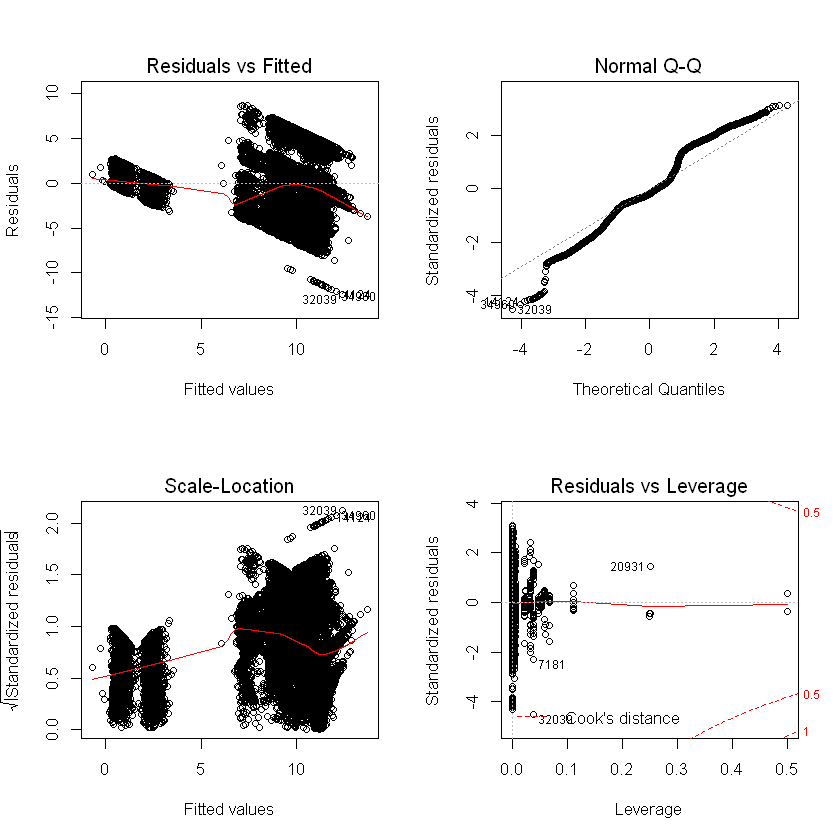

In [23]:
par(mfrow=c(2,2)) 

plot(full.model)

- sqrt 변환 처리 수행

In [24]:
full.model2<- lm(sqrt(data$Visibility)~., 
                data = data)

step.model2 <- stepAIC(full.model2,
                      direction = "both", 
                      trace = FALSE)

summary(step.model2)


Call:
lm(formula = sqrt(data$Visibility) ~ Formatted.Date + Summary + 
    Precip.Type + Apparent.Temperature..C. + Humidity + Wind.Speed..km.h. + 
    Wind.Bearing..degrees. + Pressure..millibars., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4911 -0.2307 -0.0555  0.2962  1.3595 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 3.812e+00  1.048e-01  36.386
Formatted.Date                             -4.416e-05  3.508e-06 -12.589
SummaryBreezy and Foggy                    -2.131e+00  1.807e-01 -11.791
SummaryBreezy and Mostly Cloudy            -1.734e-01  9.458e-02  -1.833
SummaryBreezy and Overcast                 -9.373e-02  9.496e-02  -0.987
SummaryBreezy and Partly Cloudy            -2.045e-01  9.518e-02  -2.149
SummaryClear                               -2.233e-03  9.084e-02  -0.025
SummaryDangerously Windy and Partly Cloudy -3.572e-01  4.776e-01  -0.748
SummaryDry           

Warning message:
"not plotting observations with leverage one:
  12182, 36470"Warning message:
"not plotting observations with leverage one:
  12182, 36470"

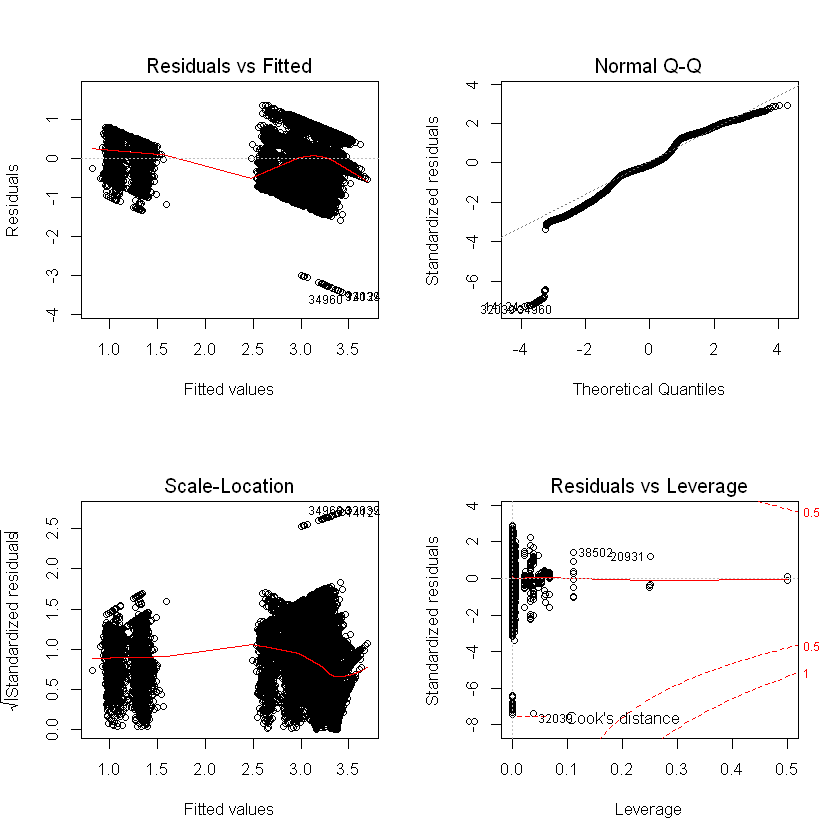

In [25]:
par(mfrow=c(2,2)) 

plot(full.model2)

# feature selection

- 모든 변수로 학습

In [27]:
fit <- lm(sqrt(data$Visibility)~., data = data)
summary(fit)


Call:
lm(formula = sqrt(data$Visibility) ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4915 -0.2307 -0.0554  0.2963  1.3596 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 3.811e+00  1.049e-01  36.340
Formatted.Date                             -4.418e-05  3.509e-06 -12.591
SummaryBreezy and Foggy                    -2.131e+00  1.807e-01 -11.792
SummaryBreezy and Mostly Cloudy            -1.728e-01  9.462e-02  -1.826
SummaryBreezy and Overcast                 -9.356e-02  9.496e-02  -0.985
SummaryBreezy and Partly Cloudy            -2.040e-01  9.521e-02  -2.142
SummaryClear                               -2.199e-03  9.084e-02  -0.024
SummaryDangerously Windy and Partly Cloudy -3.564e-01  4.777e-01  -0.746
SummaryDry                                 -3.953e-01  1.408e-01  -2.807
SummaryDry and Partly Cloudy               -3.181e-01  1.221e-01  -2.604
SummaryFoggy                

## forward

- 하나씩 변수를 추가하는 방법.

In [28]:
fit.con <- lm(sqrt(data$Visibility)~1, data=data)

fit.forward <- step(fit.con, scope = list(lower = fit.con, upper = fit), direction = "forward")

summary(fit.forward)

Start:  AIC=-30487.56
sqrt(data$Visibility) ~ 1

                           Df Sum of Sq   RSS    AIC
+ Summary                  20   15336.8 11836 -72000
+ Temperature..C.           1    4357.3 22816 -39224
+ Apparent.Temperature..C.  1    4029.0 23144 -38510
+ Humidity                  1    3817.2 23356 -38054
+ Precip.Type               1    3809.6 23364 -38038
+ Wind.Speed..km.h.         1     633.8 26539 -31666
+ Formatted.Date            1     135.7 27038 -30736
+ Wind.Bearing..degrees.    1     111.0 27062 -30690
<none>                                  27173 -30488
+ Pressure..millibars.      1       0.1 27173 -30486

Step:  AIC=-72000.25
sqrt(data$Visibility) ~ Summary

                           Df Sum of Sq   RSS    AIC
+ Precip.Type               1    536.22 11300 -74316
+ Temperature..C.           1    466.08 11370 -74007
+ Apparent.Temperature..C.  1    434.74 11402 -73869
+ Humidity                  1    277.39 11559 -73184
+ Wind.Speed..km.h.         1    116.76 11720 -7


Call:
lm(formula = sqrt(data$Visibility) ~ Summary + Precip.Type + 
    Humidity + Wind.Speed..km.h. + Apparent.Temperature..C. + 
    Formatted.Date + Pressure..millibars. + Wind.Bearing..degrees., 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4911 -0.2307 -0.0555  0.2962  1.3595 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 3.812e+00  1.048e-01  36.386
SummaryBreezy and Foggy                    -2.131e+00  1.807e-01 -11.791
SummaryBreezy and Mostly Cloudy            -1.734e-01  9.458e-02  -1.833
SummaryBreezy and Overcast                 -9.373e-02  9.496e-02  -0.987
SummaryBreezy and Partly Cloudy            -2.045e-01  9.518e-02  -2.149
SummaryClear                               -2.233e-03  9.084e-02  -0.025
SummaryDangerously Windy and Partly Cloudy -3.572e-01  4.776e-01  -0.748
SummaryDry                                 -3.945e-01  1.407e-01  -2.803
SummaryDry and P

- 전체 변수에서 하나씩 제거해나가는 방법

In [29]:
fit.backward <- step(fit, scope = list(lower = fit.con, upper = fit), direction = "backward")
summary(fit.backward)

Start:  AIC=-75710.02
sqrt(data$Visibility) ~ Formatted.Date + Summary + Precip.Type + 
    Temperature..C. + Apparent.Temperature..C. + Humidity + Wind.Speed..km.h. + 
    Wind.Bearing..degrees. + Pressure..millibars.

                           Df Sum of Sq   RSS    AIC
- Temperature..C.           1       0.0 10986 -75712
<none>                                  10986 -75710
- Apparent.Temperature..C.  1       0.8 10987 -75708
- Wind.Bearing..degrees.    1      10.3 10997 -75665
- Pressure..millibars.      1      16.1 11002 -75639
- Humidity                  1      31.9 11018 -75567
- Formatted.Date            1      34.9 11021 -75554
- Wind.Speed..km.h.         1      48.4 11035 -75492
- Precip.Type               1     187.8 11174 -74865
- Summary                  20    9757.8 20744 -43970

Step:  AIC=-75711.97
sqrt(data$Visibility) ~ Formatted.Date + Summary + Precip.Type + 
    Apparent.Temperature..C. + Humidity + Wind.Speed..km.h. + 
    Wind.Bearing..degrees. + Pressure..milliba


Call:
lm(formula = sqrt(data$Visibility) ~ Formatted.Date + Summary + 
    Precip.Type + Apparent.Temperature..C. + Humidity + Wind.Speed..km.h. + 
    Wind.Bearing..degrees. + Pressure..millibars., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4911 -0.2307 -0.0555  0.2962  1.3595 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 3.812e+00  1.048e-01  36.386
Formatted.Date                             -4.416e-05  3.508e-06 -12.589
SummaryBreezy and Foggy                    -2.131e+00  1.807e-01 -11.791
SummaryBreezy and Mostly Cloudy            -1.734e-01  9.458e-02  -1.833
SummaryBreezy and Overcast                 -9.373e-02  9.496e-02  -0.987
SummaryBreezy and Partly Cloudy            -2.045e-01  9.518e-02  -2.149
SummaryClear                               -2.233e-03  9.084e-02  -0.025
SummaryDangerously Windy and Partly Cloudy -3.572e-01  4.776e-01  -0.748
SummaryDry           

In [30]:
fit.both <- step(fit.con, scope = list(lower = fit.con, upper = fit), direction = "both")
summary(fit.both)

Start:  AIC=-30487.56
sqrt(data$Visibility) ~ 1

                           Df Sum of Sq   RSS    AIC
+ Summary                  20   15336.8 11836 -72000
+ Temperature..C.           1    4357.3 22816 -39224
+ Apparent.Temperature..C.  1    4029.0 23144 -38510
+ Humidity                  1    3817.2 23356 -38054
+ Precip.Type               1    3809.6 23364 -38038
+ Wind.Speed..km.h.         1     633.8 26539 -31666
+ Formatted.Date            1     135.7 27038 -30736
+ Wind.Bearing..degrees.    1     111.0 27062 -30690
<none>                                  27173 -30488
+ Pressure..millibars.      1       0.1 27173 -30486

Step:  AIC=-72000.25
sqrt(data$Visibility) ~ Summary

                           Df Sum of Sq   RSS    AIC
+ Precip.Type               1     536.2 11300 -74316
+ Temperature..C.           1     466.1 11370 -74007
+ Apparent.Temperature..C.  1     434.7 11402 -73869
+ Humidity                  1     277.4 11559 -73184
+ Wind.Speed..km.h.         1     116.8 11720 -7


Call:
lm(formula = sqrt(data$Visibility) ~ Summary + Precip.Type + 
    Humidity + Wind.Speed..km.h. + Apparent.Temperature..C. + 
    Formatted.Date + Pressure..millibars. + Wind.Bearing..degrees., 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4911 -0.2307 -0.0555  0.2962  1.3595 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 3.812e+00  1.048e-01  36.386
SummaryBreezy and Foggy                    -2.131e+00  1.807e-01 -11.791
SummaryBreezy and Mostly Cloudy            -1.734e-01  9.458e-02  -1.833
SummaryBreezy and Overcast                 -9.373e-02  9.496e-02  -0.987
SummaryBreezy and Partly Cloudy            -2.045e-01  9.518e-02  -2.149
SummaryClear                               -2.233e-03  9.084e-02  -0.025
SummaryDangerously Windy and Partly Cloudy -3.572e-01  4.776e-01  -0.748
SummaryDry                                 -3.945e-01  1.407e-01  -2.803
SummaryDry and P

# Multicollinearity(다중공선성)

- GVIF^(1/(2*Df))가 2를 넘으면, 다중공선성 문제가 있다고 본다.
- Apparent.Temperature..C. & Temperature..C.를 제거한다.

In [31]:
vif(fit)

,GVIF,Df,GVIF^(1/(2*Df))
Formatted.Date,1.025875,1,1.012855
Summary,2.034432,20,1.017914
Precip.Type,1.710209,1,1.307749
Temperature..C.,103.532289,1,10.175082
Apparent.Temperature..C.,101.417232,1,10.070612
Humidity,2.169043,1,1.472767
Wind.Speed..km.h.,2.053385,1,1.432964
Wind.Bearing..degrees.,1.026115,1,1.012973
Pressure..millibars.,1.026477,1,1.013152


In [32]:
df <- subset(data, select = -cbind(Temperature..C., Apparent.Temperature..C.))

In [33]:
str(df)

'data.frame':	50000 obs. of  8 variables:
 $ Formatted.Date        : Date, format: "2006-04-01" "2006-04-01" ...
 $ Summary               : Factor w/ 21 levels "Breezy","Breezy and Foggy",..: 16 16 14 16 14 16 16 16 16 16 ...
 $ Precip.Type           : Factor w/ 2 levels "rain","snow": 1 1 1 1 1 1 1 1 1 1 ...
 $ Humidity              : num  0.89 0.86 0.89 0.83 0.83 0.85 0.95 0.89 0.82 0.72 ...
 $ Wind.Speed..km.h.     : num  14.12 14.26 3.93 14.1 11.04 ...
 $ Wind.Bearing..degrees.: int  251 259 204 269 259 258 259 260 259 279 ...
 $ Pressure..millibars.  : num  1015 1016 1016 1016 1017 ...
 $ Visibility            : num  15.8 15.8 15 15.8 15.8 ...


In [34]:
fit1 <- lm(sqrt(df$Visibility)~., data = df)
summary(fit1)


Call:
lm(formula = sqrt(df$Visibility) ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4541 -0.2256 -0.0553  0.2969  1.3655 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 3.894e+00  1.047e-01  37.175
Formatted.Date                             -3.906e-05  3.491e-06 -11.188
SummaryBreezy and Foggy                    -2.092e+00  1.810e-01 -11.557
SummaryBreezy and Mostly Cloudy            -1.605e-01  9.473e-02  -1.694
SummaryBreezy and Overcast                 -8.570e-02  9.512e-02  -0.901
SummaryBreezy and Partly Cloudy            -2.004e-01  9.533e-02  -2.102
SummaryClear                                3.429e-03  9.099e-02   0.038
SummaryDangerously Windy and Partly Cloudy -3.400e-01  4.784e-01  -0.711
SummaryDry                                 -3.583e-01  1.409e-01  -2.542
SummaryDry and Partly Cloudy               -3.083e-01  1.223e-01  -2.521
SummaryFoggy                    

In [35]:
vif(fit1)

,GVIF,Df,GVIF^(1/(2*Df))
Formatted.Date,1.012416,1,1.006189
Summary,1.938710,20,1.016688
Precip.Type,1.155908,1,1.075131
Humidity,1.403942,1,1.184880
Wind.Speed..km.h.,1.466257,1,1.210891
Wind.Bearing..degrees.,1.023532,1,1.011698
Pressure..millibars.,1.024691,1,1.012270


Warning message:
"not plotting observations with leverage one:
  12182, 36470"Warning message:
"not plotting observations with leverage one:
  12182, 36470"

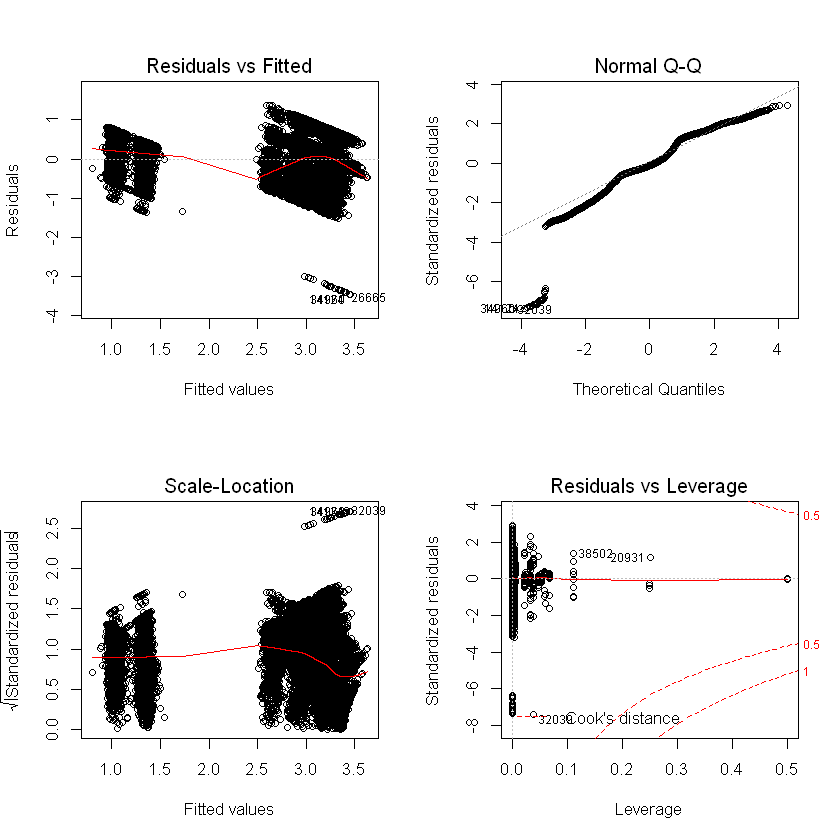

In [36]:
par(mfrow=c(2,2))
plot(fit1)

In [37]:
fit2 <- lm(sqrt(Visibility)~., data = df[-c(20931,32039,7181,14124,34960,38502,26665),])
summary(fit2)


Call:
lm(formula = sqrt(Visibility) ~ ., data = df[-c(20931, 32039, 
    7181, 14124, 34960, 38502, 26665), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4018 -0.2261 -0.0552  0.2968  1.3656 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 4.067e+00  1.076e-01  37.811
Formatted.Date                             -3.902e-05  3.484e-06 -11.199
SummaryBreezy and Foggy                    -2.343e+00  1.906e-01 -12.295
SummaryBreezy and Mostly Cloudy            -3.352e-01  9.792e-02  -3.424
SummaryBreezy and Overcast                 -2.603e-01  9.829e-02  -2.648
SummaryBreezy and Partly Cloudy            -3.752e-01  9.850e-02  -3.809
SummaryClear                               -1.691e-01  9.432e-02  -1.793
SummaryDangerously Windy and Partly Cloudy -5.153e-01  4.781e-01  -1.078
SummaryDry                                 -5.333e-01  1.429e-01  -3.731
SummaryDry and Partly Cloudy               -4.832

Warning message:
"not plotting observations with leverage one:
  12181, 36464"Warning message:
"not plotting observations with leverage one:
  12181, 36464"

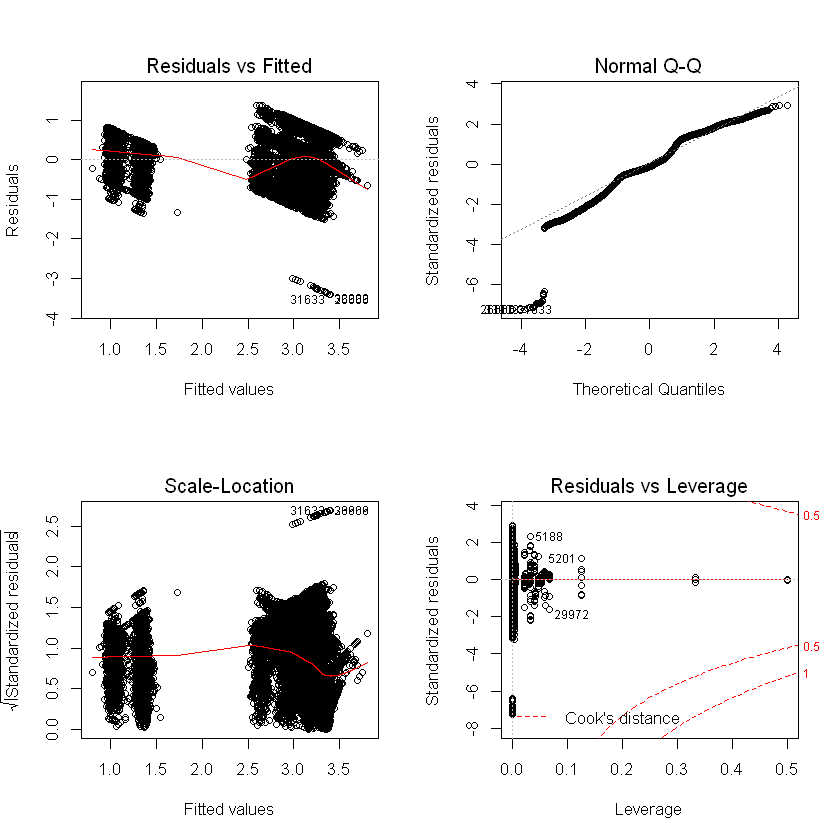

In [38]:
par(mfrow=c(2,2))
plot(fit2)

In [41]:
cooksdistance <- cooks.distance(fit2)
influential <- as.numeric(names(cooksdistance)[(cooksdistance > 4 * mean(cooksdistance, na.rm = TRUE))]) 

In [47]:
str(df[influential,])

'data.frame':	1338 obs. of  8 variables:
 $ Formatted.Date        : Date, format: "2006-04-11" "2006-04-11" ...
 $ Summary               : Factor w/ 21 levels "Breezy","Breezy and Foggy",..: 15 15 15 16 14 14 15 6 6 6 ...
 $ Precip.Type           : Factor w/ 2 levels "rain","snow": 1 1 1 1 1 1 1 1 1 1 ...
 $ Humidity              : num  0.93 0.96 0.96 0.96 0.95 0.96 0.96 0.96 0.96 0.96 ...
 $ Wind.Speed..km.h.     : num  23.22 25.42 28.13 3.35 2.85 ...
 $ Wind.Bearing..degrees.: int  340 330 339 284 298 335 332 321 319 100 ...
 $ Pressure..millibars.  : num  1005 1005 1005 1012 1016 ...
 $ Visibility            : num  3.82 4.49 4.44 4.12 3.64 ...


# remove outlier

In [59]:
rm_out_df<-setdiff(df,df[influential,] )

In [61]:
str(rm_out_df)

'data.frame':	48635 obs. of  8 variables:
 $ Formatted.Date        : Date, format: "2006-04-01" "2006-04-01" ...
 $ Summary               : Factor w/ 21 levels "Breezy","Breezy and Foggy",..: 16 16 14 16 14 16 16 16 16 16 ...
 $ Precip.Type           : Factor w/ 2 levels "rain","snow": 1 1 1 1 1 1 1 1 1 1 ...
 $ Humidity              : num  0.89 0.86 0.89 0.83 0.83 0.85 0.95 0.89 0.82 0.72 ...
 $ Wind.Speed..km.h.     : num  14.12 14.26 3.93 14.1 11.04 ...
 $ Wind.Bearing..degrees.: int  251 259 204 269 259 258 259 260 259 279 ...
 $ Pressure..millibars.  : num  1015 1016 1016 1016 1017 ...
 $ Visibility            : num  15.8 15.8 15 15.8 15.8 ...


In [66]:
fit3 <- lm(sqrt(Visibility)~., data = rm_out_df)
summary(fit3)


Call:
lm(formula = sqrt(Visibility) ~ ., data = rm_out_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4829 -0.2148 -0.0608  0.2794  1.2290 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 1.719e+00  3.171e-01   5.422
Formatted.Date                             -4.432e-05  3.343e-06 -13.259
SummaryBreezy and Foggy                     7.439e-01  5.418e-01   1.373
SummaryBreezy and Mostly Cloudy             1.963e+00  3.142e-01   6.249
SummaryBreezy and Overcast                  2.037e+00  3.153e-01   6.462
SummaryBreezy and Partly Cloudy             1.957e+00  3.143e-01   6.227
SummaryClear                                2.242e+00  3.129e-01   7.164
SummaryDangerously Windy and Partly Cloudy  1.867e+00  5.419e-01   3.445
SummaryDry                                  1.866e+00  3.345e-01   5.577
SummaryDry and Partly Cloudy                1.895e+00  3.236e-01   5.858
SummaryFoggy                

# fitting

- sqrt 변환을 해주었기에 학습한 값에 제곱을 해주어야 원하는 예측치를 얻을 수 있다.

In [71]:
yhat = fitted(fit3)^2

In [72]:
rm_out_df$yhat <- yhat

In [73]:
rm_out_df

Formatted.Date,Summary,Precip.Type,Humidity,Wind.Speed..km.h.,Wind.Bearing..degrees.,Pressure..millibars.,Visibility,yhat
2006-04-01,Partly Cloudy,rain,0.89,14.1197,251,1015.13,15.8263,11.04210
2006-04-01,Partly Cloudy,rain,0.86,14.2646,259,1015.63,15.8263,11.09973
2006-04-01,Mostly Cloudy,rain,0.89,3.9284,204,1015.94,14.9569,10.53068
2006-04-01,Partly Cloudy,rain,0.83,14.1036,269,1016.41,15.8263,11.14974
2006-04-01,Mostly Cloudy,rain,0.83,11.0446,259,1016.51,15.8263,10.89731
2006-04-01,Partly Cloudy,rain,0.85,13.9587,258,1016.66,14.9569,11.10490
2006-04-01,Partly Cloudy,rain,0.95,12.3648,259,1016.72,9.9820,10.90515
2006-04-01,Partly Cloudy,rain,0.89,14.1519,260,1016.84,9.9820,11.05333
2006-04-01,Partly Cloudy,rain,0.82,11.3183,259,1017.37,9.9820,11.06588
2006-04-01,Partly Cloudy,rain,0.72,12.5258,279,1017.22,9.9820,11.27428


유의확률 2.2e-16(=0.000)이므로 유의수준 0.05에서 회귀모형은 통계적으로 타당하다. 즉, 독립변수들이 영향을 준다.